In [30]:
import matplotlib.pyplot as plt
import numpy
import torch as t

from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


In [31]:
train_data = datasets.MNIST(
    "./data", train=True, download=True, transform=transforms.ToTensor()
)
test_data = datasets.MNIST(
    "./data", train=False, download=True, transform=transforms.ToTensor()
)

print(len(train_data), len(test_data))

60000 10000


In [32]:
class Autoencoder(nn.Module):
    def __init__(self, code_size):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, code_size),
        )
        self.decoder = nn.Sequential(
            nn.Linear(code_size, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid(), # Sigmod function to get values between 0 and 1
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded.view(-1, 1, 28, 28)
    


In [36]:
from torch.utils.data import DataLoader
def train(autoencoder, optimizer, data):
  train_loader = DataLoader(data, batch_size=128, shuffle=True)
  autoencoder.train()
  for img, _ in train_loader:
    optimizer.zero_grad()
    output = autoencoder(img)
    loss = nn.MSELoss()(output, img)
    loss.backward()
    optimizer.step()
    print(loss.item())

  
autoencoder = Autoencoder(code_size=16)
optimizer =t.optim.Adam(autoencoder.parameters(), lr=1e-3)


In [37]:
for epoch in range(10):
  print("Epoch: ", epoch)
  train(autoencoder, optimizer, train_data)

Epoch:  0
0.2318067103624344
0.22931461036205292
0.22684232890605927
0.22410441935062408
0.2209472507238388
0.21619912981987
0.20998471975326538
0.2017492949962616
0.19301070272922516
0.18222633004188538
0.1716432422399521
0.15916505455970764
0.14633618295192719
0.13242459297180176
0.12274760007858276
0.10894647240638733
0.10043126344680786
0.09053989499807358
0.08622992038726807
0.08349641412496567
0.0848337784409523
0.07728821039199829
0.07541701197624207
0.0770728662610054
0.07437155395746231
0.07416987419128418
0.07327263057231903
0.07908660918474197
0.07740726321935654
0.07388454675674438
0.07533030211925507
0.0738072544336319
0.07478033751249313
0.0716140866279602
0.07125189155340195
0.07373815774917603
0.07566659897565842
0.0707908645272255
0.07470002770423889
0.07357650250196457
0.07351160794496536
0.07518774271011353
0.0703955590724945
0.07325199246406555
0.0705941691994667
0.07308560609817505
0.06772708147764206
0.07296524941921234
0.07165010273456573
0.0725066140294075
0.073

torch.Size([1, 28, 28])


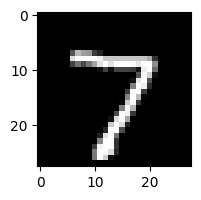

torch.Size([1, 28, 28])


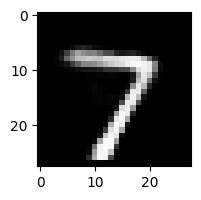

torch.Size([1, 28, 28])


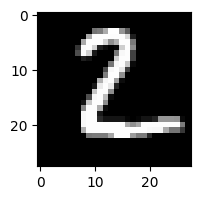

torch.Size([1, 28, 28])


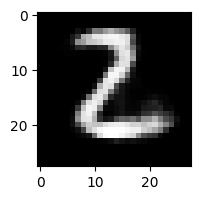

torch.Size([1, 28, 28])


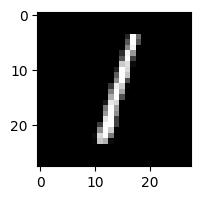

torch.Size([1, 28, 28])


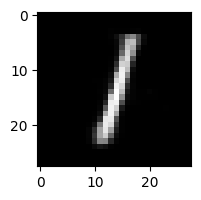

torch.Size([1, 28, 28])


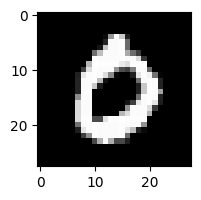

torch.Size([1, 28, 28])


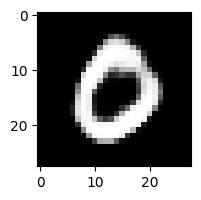

torch.Size([1, 28, 28])


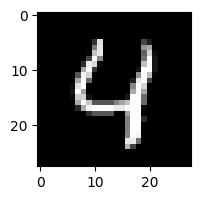

torch.Size([1, 28, 28])


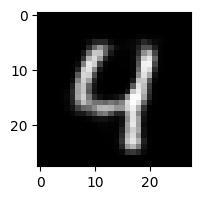

In [38]:

for i in range(5):
  image = test_data[i][0]
  plt.figure(figsize=(9, 2))
  plt.imshow(image[0], cmap="gray")
  print(image.shape)
  plt.show()
  encoded_image = autoencoder.forward(image.unsqueeze(0))[0].detach()
  print(encoded_image.shape)
  plt.figure(figsize=(9, 2))
  plt.imshow(encoded_image[0], cmap="gray")
  plt.show()
  